# Question 1: Prime Numbers

In [21]:
primes = []
n = 2
while len(primes) < 1000:
    is_divisible = False
    for prime in primes:
        if n % prime == 0:
            is_divisible = True
            break
    if not is_divisible:
        primes.append(n)
    n = n + 1
# Print the last one
primes[-1] 

7919

#  Question 2: Find product XYZ

In [25]:
import math

for a in range(1,1000):
    for b in range(1,1000):
        c = math.sqrt(a**2 + b**2)
        if (c == int(c)) & (a+b+c == 1000):
            print([a,b,int(c)])

[200, 375, 425]
[375, 200, 425]


# Lesson 5: Numerical and Categorical data

In [32]:
import numpy as np
import pandas as pd

In [33]:
df = pd.read_csv("train.csv")
df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
980,981,85,RL,NaN,12122,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,178400
1098,1099,50,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,128000
855,856,20,RL,NaN,6897,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,127000
273,274,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,139000
221,222,60,RL,NaN,8068,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2009,ConLI,Normal,200000


## Feature scaling
* Scale numeric data
    - Standardization
    - Normalization

### Normalization
- Shifts and rescales to range between 0 and 1.
- Uses maximum and minimum values

In [34]:
from sklearn import preprocessing

In [38]:
feature = np.array([[-500.5],[-100.1],[0],[100.1],[900.9]])
# Using standard range (0 to 1)
minmax_scale = preprocessing.MinMaxScaler(feature_range = (0,1))
scaled_feature = minmax_scale.fit_transform(feature)
scaled_feature

array([[0.        ],
       [0.28571429],
       [0.35714286],
       [0.42857143],
       [1.        ]])

In [39]:
# Using arbitrary range
minmax_scale = preprocessing.MinMaxScaler(feature_range = (1,5))
scaled_feature = minmax_scale.fit_transform(feature)
scaled_feature

array([[1.        ],
       [2.14285714],
       [2.42857143],
       [2.71428571],
       [5.        ]])

## Standardization
- Shifts and rescales to be around 0 in range from -1 to 1

In [40]:
feature = np.array([[-1000.1],[-200.2],[500.5],[600.6],[9000.9]])
scaler = preprocessing.StandardScaler()
standardized = scaler.fit_transform(feature)
standardized


array([[-0.76058269],
       [-0.54177196],
       [-0.35009716],
       [-0.32271504],
       [ 1.97516685]])

## Outliers

In [42]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [44]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1
print(IQR)

Id                 729.50
MSSubClass          50.00
LotFrontage         21.00
LotArea           4048.00
OverallQual          2.00
OverallCond          1.00
YearBuilt           46.00
YearRemodAdd        37.00
MasVnrArea         166.00
BsmtFinSF1         712.25
BsmtFinSF2           0.00
BsmtUnfSF          585.00
TotalBsmtSF        502.50
1stFlrSF           509.25
2ndFlrSF           728.00
LowQualFinSF         0.00
GrLivArea          647.25
BsmtFullBath         1.00
BsmtHalfBath         0.00
FullBath             1.00
HalfBath             1.00
BedroomAbvGr         1.00
KitchenAbvGr         0.00
TotRmsAbvGrd         2.00
Fireplaces           1.00
GarageYrBlt         41.00
GarageCars           1.00
GarageArea         241.50
WoodDeckSF         168.00
OpenPorchSF         68.00
EnclosedPorch        0.00
3SsnPorch            0.00
ScreenPorch          0.00
PoolArea             0.00
MiscVal              0.00
MoSold               3.00
YrSold               2.00
SalePrice        84025.00
dtype: float

In [49]:
lower_wisker = q1 - 1.5*IQR
upper_wisker = q3 + 1.5*IQR

In [50]:
lower_wisker

Id               -728.500
MSSubClass        -55.000
LotFrontage        27.500
LotArea          1481.500
OverallQual         2.000
OverallCond         3.500
YearBuilt        1885.000
YearRemodAdd     1911.500
MasVnrArea       -249.000
BsmtFinSF1      -1068.375
BsmtFinSF2          0.000
BsmtUnfSF        -654.500
TotalBsmtSF        42.000
1stFlrSF          118.125
2ndFlrSF        -1092.000
LowQualFinSF        0.000
GrLivArea         158.625
BsmtFullBath       -1.500
BsmtHalfBath        0.000
FullBath           -0.500
HalfBath           -1.500
BedroomAbvGr        0.500
KitchenAbvGr        1.000
TotRmsAbvGrd        2.000
Fireplaces         -1.500
GarageYrBlt      1899.500
GarageCars         -0.500
GarageArea        -27.750
WoodDeckSF       -252.000
OpenPorchSF      -102.000
EnclosedPorch       0.000
3SsnPorch           0.000
ScreenPorch         0.000
PoolArea            0.000
MiscVal             0.000
MoSold              0.500
YrSold           2004.000
SalePrice        3937.500
dtype: float

In [51]:
upper_wisker

Id                 2189.500
MSSubClass          145.000
LotFrontage         111.500
LotArea           17673.500
OverallQual          10.000
OverallCond           7.500
YearBuilt          2069.000
YearRemodAdd       2059.500
MasVnrArea          415.000
BsmtFinSF1         1780.625
BsmtFinSF2            0.000
BsmtUnfSF          1685.500
TotalBsmtSF        2052.000
1stFlrSF           2155.125
2ndFlrSF           1820.000
LowQualFinSF          0.000
GrLivArea          2747.625
BsmtFullBath          2.500
BsmtHalfBath          0.000
FullBath              3.500
HalfBath              2.500
BedroomAbvGr          4.500
KitchenAbvGr          1.000
TotRmsAbvGrd         10.000
Fireplaces            2.500
GarageYrBlt        2063.500
GarageCars            3.500
GarageArea          938.250
WoodDeckSF          420.000
OpenPorchSF         170.000
EnclosedPorch         0.000
3SsnPorch             0.000
ScreenPorch           0.000
PoolArea              0.000
MiscVal               0.000
MoSold              

In [64]:
outlier = (df < lower_wisker) | (df > upper_wisker)
outlier

<ipython-input-64-5ce0c6a5507a>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outlier = (df < lower_wisker) | (df > upper_wisker)
<ipython-input-64-5ce0c6a5507a>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outlier = (df < lower_wisker) | (df > upper_wisker)


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1456,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


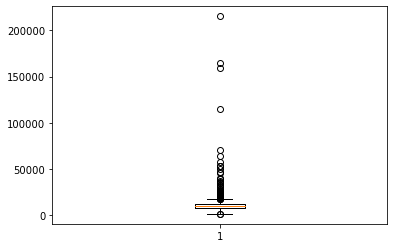

In [67]:
from matplotlib import pyplot as plt
plt.boxplot(df["LotArea"])
plt.show()

<AxesSubplot:>

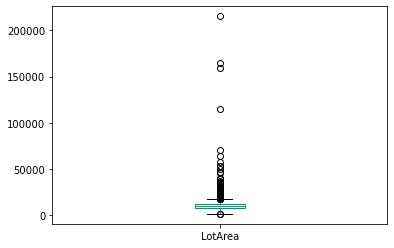

In [69]:
df["LotArea"].plot.box()

<AxesSubplot:>

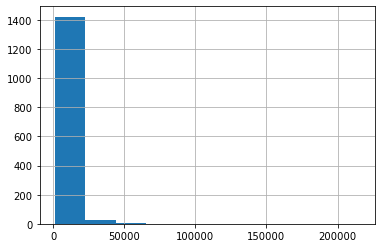

In [70]:
df["LotArea"].hist()

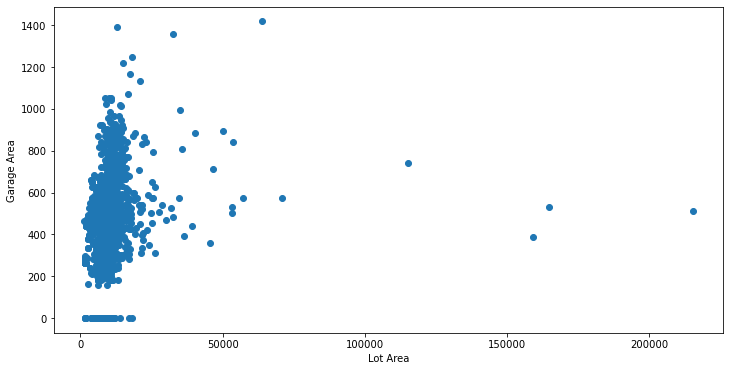

In [74]:
dig, ax = plt.subplots(figsize = (12,6))
ax.scatter(df["LotArea"], df["GarageArea"])
ax.set_xlabel('Lot Area')
ax.set_ylabel('Garage Area')
plt.show()

#### Outliers treatment